# Qubolite on Dynex Example: Clustering of a dataset

In [2]:
import dynex
from sklearn.datasets import make_blobs
from qubolite.embedding import Kernel2MeansClustering

## Generate a random dataset:

In [3]:
X, y = make_blobs(n_samples=30, centers=2, random_state=42)

## Create Qubo with Qubolite Kernel "Kernel2MeansClustering":

In [4]:
Q = Kernel2MeansClustering(X).qubo

## Compute on Dynex:

In [6]:
sampleset = dynex.sample_qubo(Q.m, mainnet=False, num_reads=1024, annealing_time=200, debugging=False)
print(sampleset)

[DYNEX] PRECISION SET TO 0.001
[DYNEX] SAMPLER INITIALISED
[DYNEX|TESTNET] *** WAITING FOR READS ***
╭────────────┬─────────────┬───────────┬───────────────────────────┬─────────┬─────────┬────────────────╮
│   DYNEXJOB │   BLOCK FEE │ ELAPSED   │ WORKERS READ              │ CHIPS   │ STEPS   │ GROUND STATE   │
├────────────┼─────────────┼───────────┼───────────────────────────┼─────────┼─────────┼────────────────┤
│         -1 │           0 │           │ *** WAITING FOR READS *** │         │         │                │
╰────────────┴─────────────┴───────────┴───────────────────────────┴─────────┴─────────┴────────────────╯

[DYNEX] FINISHED READ AFTER 0.00 SECONDS
[DYNEX] SAMPLESET READY
   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ... 29       energy num_oc.
0  0  1  0  1  1  1  1  0  1  1  1  0  0  0  0  0 ...  0 -5779.668138       1
['BINARY', 1 rows, 1 samples, 30 variables]


## Visualize Dataset:

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

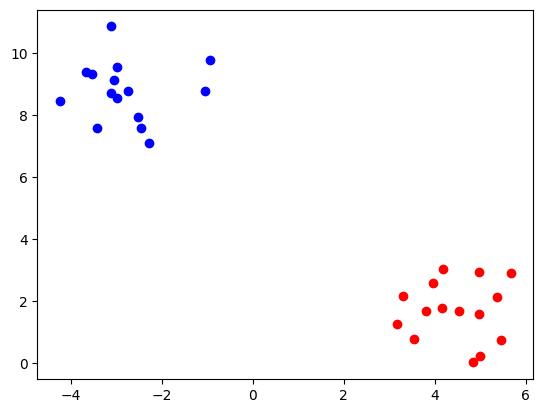

In [11]:
x1,y1 = np.array(X).T
for i in range(0,len(X)): 
    if sampleset.first.sample[i]==0:
        plt.plot(X[i][0],X[i][1], 'o', color='blue');
    else:
        plt.plot(X[i][0],X[i][1], 'o', color='red');